# Pymaceuticals Inc.
---

### Analysis

- Purpose: 
    - The purpose of this study was to compare Pymaceuticals, Inc.'s drug, Capomulin, against nine other cancer treatments currently on the market. This study looked at drug performance as a measure of Tumor Volume (mm3) on mice over a period of 45 days. This analysis was completed using data from 248 mice. 

- Key Findings: 
    - Capomulin performed in the top two drug regimens, as shown by the summary statistics table under the section "Summary Statistics". The mean Tumor Volume of Capomulin-treated mice was 40.68 mm3, which is closely trailing Ramicane-treated mice (40.22 mm3). The eight other treatments analyzed in this study produced mean tumor volumes of 52 mm3 and above. Both Capomulin and Ramicane also returned low Standard Error for Tumor Volume, demostrating that the mean of each is a reliable and precise value. 
    - When looking at four treatments (Capomulin, Ramicane, Infubinol, and Ceftamin) and the correpsonding results more closely in the "Quartiles, Outliers, and Boxplots" section, it is evident that Capomulin does not have any outliers in its Tumor Volume for each mouse studied. This assures us of the high-quality results of the Capomulin-treated mice, and indicates that there are no Tumor Volume values that are skewing the data or leading us to make incorrect conclusions regarding Capomulin performance. Infubinol's low outlier potentially may be skewing this treatment's mean Tumor Volume as lower than it should be. 
    - Due to the approximately equal distribution of male and female mice used in this study, there is not sufficient evidence to suggest that any given drug regimen has increased efficacy with any given sex. 
    
- Limitations:
    - In the Bar and Pie Charts section, it is evident that Capomulin and Ramicane had the greatest number of observed timepoints in the study. While this is an excellent marker that the data for Capomulin and Ramicane is strong, it leaves the question whether another drug regimen may have had better results if more timepoints were observed. 
    - Not explicitly mentioned in the results of the study, but assumed for the sake of analysis, is that all other factors were controlled throughout the duration of this study. This includes but is not limited to environment, diet, exercise, and sleep for each mouse. 
    
- Conclusion:
    - Capomulin is one of the top performing drugs in this study when measuring Tumor Volume (mm3) in mice over a period of 45 days. There is a very close competitor, Ramicane, that returns similar Tumor Volumes. Neither Capomulin's or Ramicane's results are skewed healivy by extreme values in the dataset and both are robust in their data quality, as they had high numbers of timepoints observed throughout the study. While Capomulin's results are undeniable, market research should be conducted to see how to best market Capomulin as a direct competitor to Ramicane. 
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import pearsonr
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_merged = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")

# Display the data table for preview
mouse_study_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mouse_study_merged["Mouse ID"].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_duplicates = mouse_study_merged[mouse_study_merged.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False)]

# Create variable for duplicates to use
duplicates = mouse_duplicates["Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_study_merged.loc[(mouse_study_merged["Mouse ID"] == duplicates[0])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_study_merged[mouse_study_merged["Mouse ID"] != duplicates[0]]
clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_volume = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_volume = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance_volume = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_volume = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
standard_error_volume = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_regimen_df = pd.DataFrame({
    "Mean Tumor Volume" : mean_volume, 
    "Median Tumor Volume" : median_volume, 
    "Tumor Volume Variance" : variance_volume, 
    "Tumor Volume Std. Dev." : std_volume, 
    "Tumor Volume Std. Err." : standard_error_volume
})
drug_regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_summary_stats = clean_mouse_data.groupby(["Drug Regimen"]).agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
drug_summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

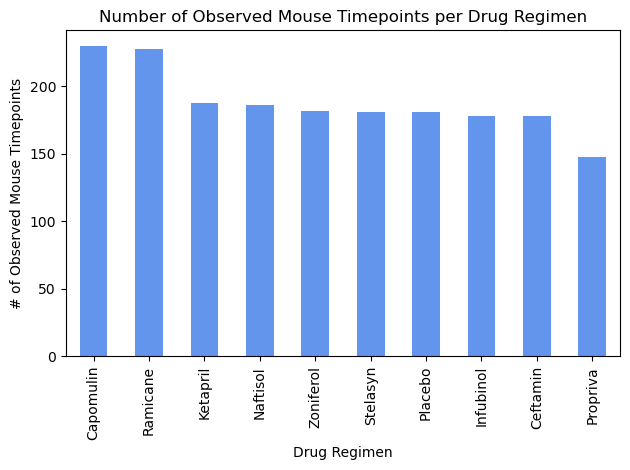

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Create columns for new DF
mouse_count = clean_mouse_data["Drug Regimen"].value_counts()

# Create new DF
mouse_count_df = pd.DataFrame({
    "Drug Regimen" : mouse_count.index,
    "Mouse Count" : mouse_count
})

# Plot using Pandas
mouse_count_df.plot(x = "Drug Regimen", y = "Mouse Count", kind = "bar", color = "cornflowerblue", legend = False)

# Formatting
plt.title("Number of Observed Mouse Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()

# Display Bar Chart
plt.show()

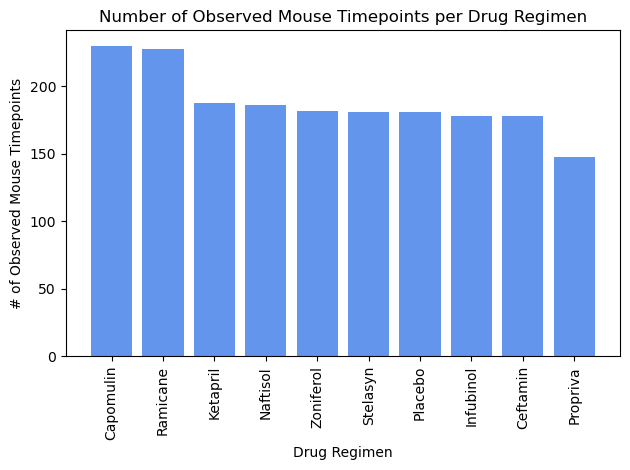

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Use Variables already created above
plt.bar(mouse_count.index, mouse_count, color = "cornflowerblue")

# Formatting
plt.xticks(rotation = "vertical")
plt.title("Number of Observed Mouse Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()

# Drisplay Bar Chart 
plt.show()

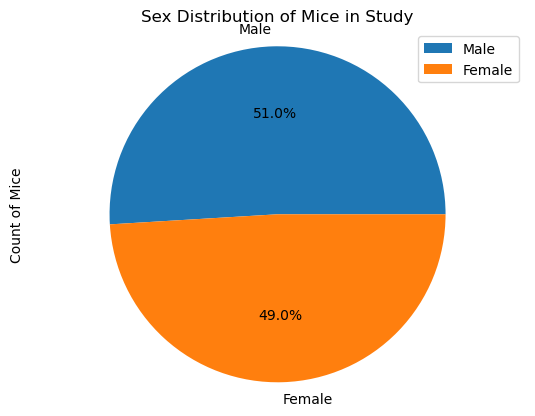

In [15]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex_distribution = clean_mouse_data["Sex"].value_counts()

# Make new DF
sex_distro_df = pd.DataFrame({
    "Count of Mice" : sex_distribution
})

# Make the pie chart
sex_distro_df.plot(kind = "pie", y = "Count of Mice", labels = sex_distro_df["Count of Mice"].index, autopct = "%1.1f%%", startangle = 0)

# Format
plt.axis("equal")
plt.title("Sex Distribution of Mice in Study")

# Display Chart
plt.show()

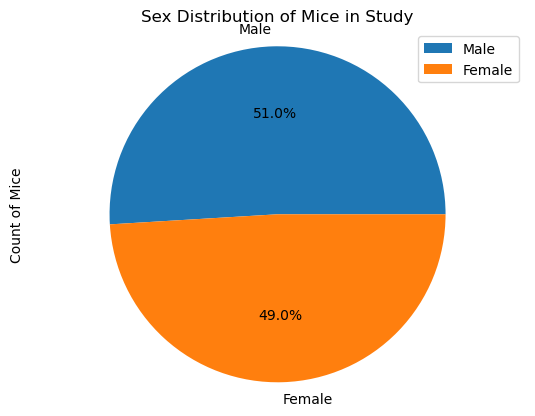

In [16]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Use variables already created in chart above
plt.pie(sex_distribution, labels = sex_distribution.index, autopct = "%1.1f%%")

# Formatting
plt.title("Sex Distribution of Mice in Study")
plt.ylabel("Count of Mice")
plt.axis("equal")
plt.legend()

# Display Chart
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoints = clean_mouse_data.groupby("Mouse ID")["Timepoint"].max()

# Create DF to merge with
greatest_timepoints_df = pd.DataFrame(greatest_timepoints)
    
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoint_df = pd.merge(clean_mouse_data, greatest_timepoints_df, on = ["Mouse ID", "Timepoint"], how = "right")
final_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
# Manually input requested regimens
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments: 
    
    # add empty list to add subsets to
    subset = []
    
    # Go through each row that has specific drug and add its Final Tumor Volume to subset list 
    drug_rows = final_timepoint_df.loc[final_timepoint_df["Drug Regimen"] == drug]
    subset.extend(drug_rows["Tumor Volume (mm3)"].tolist())
    
    # add new subset for next drug
    tumor_vol_data.append(subset)

    # Calculate the IQR and quantitatively determine if there are any potential outliers for each drug
    tumor_volume = drug_rows["Tumor Volume (mm3)"]
    quartiles_subset = tumor_volume.quantile([.25, .5, .75])
    lowerq_subset = quartiles_subset[0.25]
    upperq_subset = quartiles_subset[0.75]
    iqr_subset = upperq_subset - lowerq_subset
    lower_bound_subset = lowerq_subset - (1.5 * iqr_subset)
    upper_bound_subset = upperq_subset + (1.5 * iqr_subset)
    
    # Determine outliers using upper and lower bounds
    outliers = drug_rows.loc[(drug_rows["Tumor Volume (mm3)"] > upper_bound_subset) | (drug_rows["Tumor Volume (mm3)"] < lower_bound_subset)]
    
    # Add outliers to appropriate list
    outliers_tumor_volume = outliers["Tumor Volume (mm3)"]
    
    # Print outliers
    print(f"{drug}'s potential outliers: {outliers_tumor_volume}")
        

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


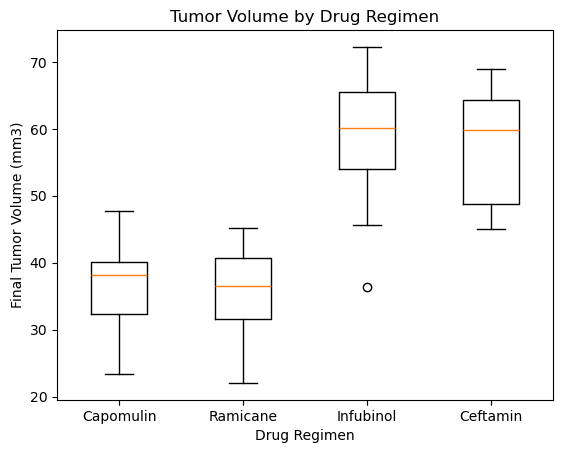

In [19]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()

# Formatting
ax1.set_title("Tumor Volume by Drug Regimen")
ax1.set_xlabel("Drug Regimen")
ax1.set_xticks(range(1, len(treatments) +1))
ax1.set_xticklabels(treatments)
ax1.set_ylabel("Final Tumor Volume (mm3)")

# Display boxplot
ax1.boxplot(tumor_vol_data, labels = treatments);

## Line and Scatter Plots

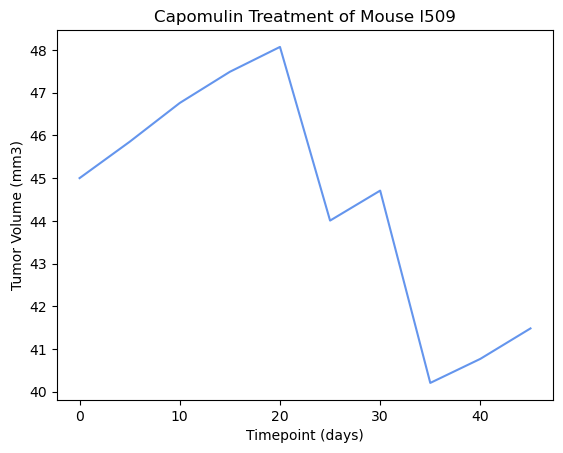

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Find Mouse l509 Data
mouse_l509_df = clean_mouse_data[clean_mouse_data["Mouse ID"] == "l509"]
l509_vol = mouse_l509_df["Tumor Volume (mm3)"]
l509_timepoint = mouse_l509_df["Timepoint"]

# Create line graph of Mouse l509 tumor vol vs. days
plt.plot(l509_timepoint, l509_vol, color = "cornflowerblue");

# Formatting
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Display graph
plt.show()

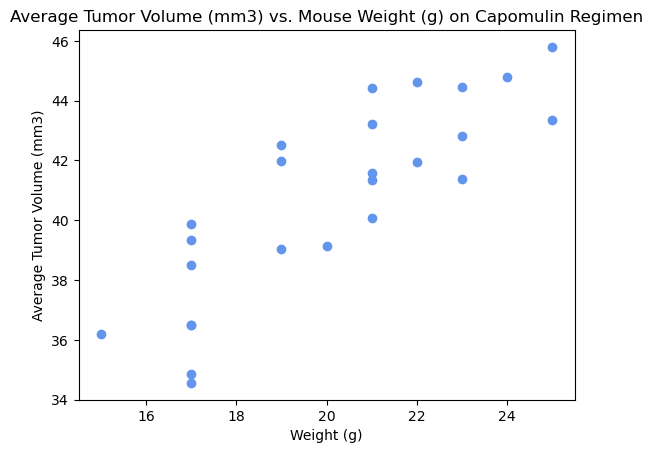

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Create new DF to hold Capomulin treated mice
capomulin_mice_df = clean_mouse_data[clean_mouse_data["Drug Regimen"] == "Capomulin"]

# Find unique mice in new DF
capomulin_mice = capomulin_mice_df["Mouse ID"].unique()

# Create lists to hold values found for scatter plot
mouse_weight = []
tumor_avg_vol = []

# Loop through each mouse in the DF to find weight and tumor vol
for mouse in capomulin_mice:
    
    # Find unique mouse
    unique_mouse = capomulin_mice_df[capomulin_mice_df["Mouse ID"] == mouse]
    
    # Find weight for each mouse and add to corresponding list
    weight = unique_mouse["Weight (g)"].unique()
    mouse_weight.append(weight)
    
    # Find avg tumor volume for specific mouse and add to corresponding list
    capomulin_tumor_avg_vol = unique_mouse["Tumor Volume (mm3)"].mean()
    tumor_avg_vol.append(capomulin_tumor_avg_vol)

# Create scatter plot
plt.scatter(mouse_weight, tumor_avg_vol, color = "cornflowerblue")

# Formatting
plt.title("Average Tumor Volume (mm3) vs. Mouse Weight (g) on Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display Scatter Plot
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


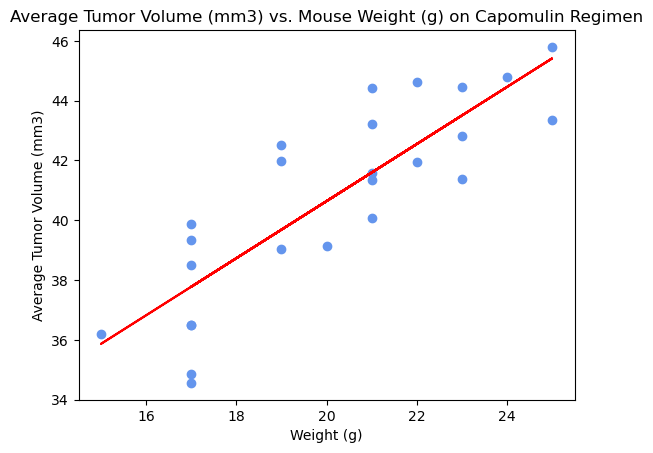

In [25]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Set variables for scatter plot and linear regression, format variables
mouse_weight = np.array(mouse_weight)
mouse_weight = mouse_weight.flatten()
tumor_avg_vol = np.array(tumor_avg_vol)

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, tumor_avg_vol)
regress_values = mouse_weight * slope + intercept

# Find Correlation Coefficient
correlation_coefficient, p_value = pearsonr(mouse_weight, tumor_avg_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_coefficient,2)}")

# Add scatter plot from above cell and linear regression model
plt.scatter(mouse_weight, tumor_avg_vol, color = "cornflowerblue")
plt.plot(mouse_weight, regress_values, "r-")

# Formatting
plt.title("Average Tumor Volume (mm3) vs. Mouse Weight (g) on Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display chart
plt.show()
